### Importa librerias para preparar el entorno que permita conectar Python con la base de datos PostgreSQL.

In [1]:
import psycopg2
import pandas as pd


### Establece los parámetros de conexión para la base de datos PostgreSQL:

In [2]:
DB_CONFIG = {
    'host': 'localhost',
    'port': 5432,
    'user': 'auser',
    'password': 'Practica1_g4',
    'dbname': 'postgres'
}
DB_ANOMALIAS = 'postgres'
CSV_PATH = ["C:\\Users\\ADMIN\\Documents\\Practica1-IDN\\IN_P1_G4\\dataset\\population_data.csv"]
BATCH_SIZE = 10
MAX_WORKERS = 10

### Verifica la conexión exitosa con la base de datos PostgreSQL

In [3]:
def verificar_conexion():
    try:
        with psycopg2.connect(**DB_CONFIG) as conn:
            with conn.cursor() as cur:
                cur.execute("SELECT 1;")
                _ = cur.fetchone()
        print("✅ Conexión exitosa a PostgreSQL.")
    except Exception as e:
        print(f"❌ Error al conectar: {e}")

### Crea dinámicamente la tabla en PostgreSQL

In [4]:
def crear_tabla(column_names, tabla='population'):
    columns_str = ', '.join([f'"{col}" VARCHAR(100)' for col in column_names])
    sql = f"CREATE TABLE IF NOT EXISTS {tabla} (id SERIAL PRIMARY KEY,{columns_str});"
    try:
        with psycopg2.connect(**DB_CONFIG) as conn:
            with conn.cursor() as cur:
                cur.execute(sql)
                conn.commit()
        print("✅ Tabla creada.")
    except Exception as e:
        print(f"❌ Error al crear la tabla: {e}")

### Ejecuta una consulta SQL en PostgreSQL y convierte el resultado directamente al DataFrame

In [5]:
def consulta_a_dataframe(query, params=None):
    try:
        with psycopg2.connect(**DB_CONFIG) as conn:
            df = pd.read_sql_query(query, conn, params=params)
        print("✅ Consulta ejecutada con éxito.")
        return df
    except Exception as e:
        print(f"❌ Error al ejecutar consulta: {e}")
        return pd.DataFrame()  # retorna vacío si falla

### Inserta múltiples registros desde el DataFrame a la tabla en PostgreSQL

In [6]:
def insertar_registros(data, tabla='population'):
    try:
        # Columnas entre comillas dobles si tienen espacios o mayúsculas
        columnas = ', '.join([f'"{col}"' for col in data.columns])
        placeholders = ', '.join(['%s'] * len(data.columns))
        sql = f"INSERT INTO {tabla} ({columnas}) VALUES ({placeholders});"
        with psycopg2.connect(**DB_CONFIG) as conn:
            with conn.cursor() as cur:
                for row in data.itertuples(index=False, name=None):
                    cur.execute(sql, row)
            conn.commit()

        print(f"✅ Insertados {len(data)} registros.")

    except Exception as e:
        print(f"❌ Error al insertar dato: {e}")

### Lee los datos desde el archivo CSV, carga la base de datos PostgreSQ e inserta los registros

In [7]:
def main():
    try:
        verificar_conexion()

        print("⏳ Leyendo archivo CSV...")
        for csv_path in CSV_PATH:
            df = pd.read_csv(csv_path, delimiter=',', encoding='utf-8')
            column_names = df.columns.tolist()
            crear_tabla(column_names)
            insertar_registros(df)
        print("⏳ Insertando registros en la base de datos...")
    except Exception as e:
        print(f"❌ Error en el proceso principal: {e}")

if __name__ == '__main__':
    main()

✅ Conexión exitosa a PostgreSQL.
⏳ Leyendo archivo CSV...
✅ Tabla creada.
✅ Insertados 264 registros.
⏳ Insertando registros en la base de datos...


# Generación de los tres DataFrames  principales en función a cada una de las fuentes de datos

### Consulta datos desde la base de datos PostgreSQL, limpia y muestra una vista rápida de los primeros registros

In [8]:
df1 = consulta_a_dataframe("SELECT * FROM population LIMIT 5;")
df1.drop(columns=['Unnamed: 62'], inplace=True)
df1.head()

✅ Consulta ejecutada con éxito.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20948\1920335490.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=params)


,id,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,3,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,5,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


### Muestra las primeras 10 filas del DataFrame

In [10]:
df2 = consulta_a_dataframe("SELECT * FROM population LIMIT 15;")
df2.head(10)

✅ Consulta ejecutada con éxito.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11292\1920335490.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=params)


,id,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,1,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,3,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,5,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
5,6,Arab World,ARB,"Population, total",SP.POP.TOTL,92490932.0,95044497.0,97682294.0,100411076.0,103239902.0,...,348145094.0,356508908.0,364895878.0,373306993.0,381702086.0,390043028.0,398304960.0,406452690.0,414491886.0,NaN
6,7,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92634.0,101078.0,112472.0,125566.0,138529.0,...,7666393.0,8270684.0,8672475.0,8900453.0,9006263.0,9070867.0,9154302.0,9269612.0,9400145.0,NaN
7,8,Argentina,ARG,"Population, total",SP.POP.TOTL,20619075.0,20953077.0,21287682.0,21621840.0,21953929.0,...,40799407.0,41223889.0,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0,44271041.0,NaN
8,9,Armenia,ARM,"Population, total",SP.POP.TOTL,1874120.0,1941491.0,2009526.0,2077575.0,2144998.0,...,2888584.0,2877311.0,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0,2930450.0,NaN
9,10,American Samoa,ASM,"Population, total",SP.POP.TOTL,20013.0,20486.0,21117.0,21882.0,22698.0,...,56227.0,55637.0,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0,55641.0,NaN


#### Genera un resumen estadístico de los datos de las columnas numéricas y distribución percentiles.

In [11]:
df1.describe()

,id
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [12]:
df2.describe()

,id
count,15.000000
mean,8.000000
std,4.472136
min,1.000000
25%,4.500000
50%,8.000000
75%,11.500000
max,15.000000


### Muestra una tupla con la cantidad de filas y columnas

In [52]:
df1.shape

(5, 63)

In [53]:
df2.shape

(15, 64)

### Elimina filas duplicadas de los DataFrame

In [13]:
df1 = df1.drop_duplicates()


In [14]:
df2 = df2.drop_duplicates()


### Revisa y detecta valores nulos en las columnas de los DataFrame

In [15]:
df1.isnull().sum()

id                0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 63, dtype: int64

In [16]:
df2.isnull().sum()


id                0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2014              0
2015              0
2016              0
2017              0
Unnamed: 62       0
Length: 64, dtype: int64

### Revisa y detecta valores nulos en las filas de los DataFrame

In [17]:
df1.isnull().sum(axis=1)

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [18]:
df2.isnull().sum(axis=1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

### Validación de cantidad de valores únicos por columnas de los DataFrame

In [19]:
df1.nunique()

id                5
Country Name      5
Country Code      5
Indicator Name    1
Indicator Code    1
                 ..
2013              5
2014              5
2015              5
2016              5
2017              5
Length: 63, dtype: int64

In [20]:
df2.nunique()


id                15
Country Name      15
Country Code      15
Indicator Name     1
Indicator Code     1
                  ..
2014              15
2015              15
2016              15
2017              15
Unnamed: 62        1
Length: 64, dtype: int64

### Validación de cantidad de valores únicos por filas de los DataFrame

In [21]:
df1.nunique(axis=1)

0    63
1    63
2    63
3    63
4    63
dtype: int64

In [22]:
df2.nunique(axis=1)


0     64
1     64
2     64
3     64
4     64
5     64
6     64
7     64
8     64
9     64
10    64
11    64
12    64
13    64
14    64
dtype: int64

### Validación de cantidad de valores únicos por columnas de los DataFrame
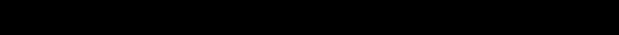
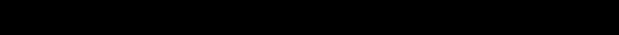

In [23]:
df1.nunique()


id                5
Country Name      5
Country Code      5
Indicator Name    1
Indicator Code    1
                 ..
2013              5
2014              5
2015              5
2016              5
2017              5
Length: 63, dtype: int64

In [24]:
df2.nunique()


id                15
Country Name      15
Country Code      15
Indicator Name     1
Indicator Code     1
                  ..
2014              15
2015              15
2016              15
2017              15
Unnamed: 62        1
Length: 64, dtype: int64

### Validación de cantidad de valores únicos por filas de los DataFrame

In [25]:
df1.nunique(axis=1)


0    63
1    63
2    63
3    63
4    63
dtype: int64

In [26]:
df2.nunique(axis=1)


0     64
1     64
2     64
3     64
4     64
5     64
6     64
7     64
8     64
9     64
10    64
11    64
12    64
13    64
14    64
dtype: int64

### Agrupación y conteo de valores para conocer la población por país sumando su año mas antiguo y actual

In [27]:
df1.groupby('Country Name')[['1960', '2017']].sum()

,1960,2017
Country Name,,
Afghanistan,8996351.0,35530081.0
Albania,1608800.0,2873457.0
Andorra,13411.0,76965.0
Angola,5643182.0,29784193.0
Aruba,54211.0,105264.0


In [28]:
df2.groupby('Country Name')[['1960', '2017']].sum()


,1960,2017
Country Name,,
Afghanistan,8996351.0,35530081.0
Albania,1608800.0,2873457.0
American Samoa,20013.0,55641.0
Andorra,13411.0,76965.0
Angola,5643182.0,29784193.0
Antigua and Barbuda,55339.0,102012.0
Arab World,92490932.0,414491886.0
Argentina,20619075.0,44271041.0
Armenia,1874120.0,2930450.0


## CREACION DE DATAFRAME A PARTIR DE CSV

### Lee el archivo CSV y carga su contenido en el DataFrame

In [11]:
df3= pd.read_csv('dataset/rural_population_percent.csv')

### Muestra las primeras 5 filas del DataFrame y convierte los nombres de las columnas del DataFrame en una lista de Python

In [12]:
print(df3.head())

# Listar los nombres de las columnas
print("Columnas del DataFrame:")
print(df3.columns.tolist())


  Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Rural population (% of total population)   
1  Afghanistan          AFG  Rural population (% of total population)   
2       Angola          AGO  Rural population (% of total population)   
3      Albania          ALB  Rural population (% of total population)   
4      Andorra          AND  Rural population (% of total population)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.RUR.TOTL.ZS  49.224  49.239  49.254  49.270  49.285  49.300  ...   
1  SP.RUR.TOTL.ZS  91.779  91.492  91.195  90.890  90.574  90.250  ...   
2  SP.RUR.TOTL.ZS  89.565  89.202  88.796  88.376  87.942  87.496  ...   
3  SP.RUR.TOTL.ZS  69.295  69.057  68.985  68.914  68.842  68.770  ...   
4  SP.RUR.TOTL.ZS  41.550  39.017  36.538  34.128  31.795  29.555  ...   

     2009    2010    2011    2012    2013    2014    2015    2016    2017  \
0  56.579  56.941  57.302  57.636  57.9

### Detecta y cuenta los valores nulos en cada columna del DataFrame

In [13]:
print(df3.isnull().sum())

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64


### Muestra el tipo de dato de cada columna del DataFrame

In [14]:
print("Tipos de datos de las columnas:")
print(df3.dtypes)

# Resumen detallado
print("\nResumen de info del DataFrame:")
print(df3.info())

Tipos de datos de las columnas:
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

Resumen de info del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            259 non-null    float64
 5   1961            259 non-null    float64
 6   1962            259 non-null    float64
 7   1963            259 non-null    float64
 8   1964            259 non-null    float64
 9   1965            259

## LIMPIEZA DEL DATASET LIMPIO

### Filtra columnas específicas del DataFrame y crea una copia con las columnas seleccionadas

In [15]:
columnas_usar = [
"Country Name",
"Country Code",
"Indicator Name",
"Indicator Code",
"2010",
"2011",
"2012",
"2013",
"2014",
"2015",
"2016",
"2017"
]
df3 = df3[columnas_usar].copy()
df3

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873
...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160


### Limpia los datos del DataFrame y elimina las filas que contienen valores nulos

In [35]:
filas_antes = len(df3)
columnas_antes = df3.shape[1]

print(f"Dataset antes de limpieza: {filas_antes} filas, {columnas_antes} columnas")
print(f"Valores nulos totales: {df3.isnull().sum().sum()}")

# Eliminación de filas con valores nulos
df3 = df3.dropna()
# Ver todas las columnas disponibles
print("Columnas en el dataset:")
print(df3.columns.tolist())

filas_despues = len(df3)
filas_eliminadas = filas_antes - filas_despues

print(f"\nDespués de dropna(): {filas_despues} filas")
print(f"Filas eliminadas: {filas_eliminadas}")
print(f"Porcentaje de datos mantenidos: {(filas_despues/filas_antes)*100:.2f}%")

# Guardar versión de dataframe limpio.
df3

Dataset antes de limpieza: 264 filas, 12 columnas
Valores nulos totales: 30
Columnas en el dataset:
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

Después de dropna(): 260 filas
Filas eliminadas: 4
Porcentaje de datos mantenidos: 98.48%


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873
...,...,...,...,...,...,...,...,...,...,...,...,...
258,Samoa,WSM,Rural population (% of total population),SP.RUR.TOTL.ZS,79.922,80.143,80.361,80.560,80.740,80.902,81.045,81.170
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160


## ANÁLISIS EXPLORATORIO DEL DATASET LIMPIO

## Muestra las dimensiones, imprime todas las columnas, muestra las primeras filas y genera estadística descriptiva de todas las columnas

In [16]:
print("Dimensiones del dataset:", df3.shape)
print("\nColumnas:", df3.columns)
print("\nPrimeras filas:")
display(df3.head())

# Estadísticas generales
print("\nEstadísticas descriptivas:")
display(df3.describe(include="all"))

# Revisar número de países y rango de años
print("\nNúmero de países:", df3['Country Name'].nunique())

Dimensiones del dataset: (264, 12)

Columnas: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

Primeras filas:


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873



Estadísticas descriptivas:


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
count,264,264,264,264,261.000000,261.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,264,264,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,264,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,43.046385,42.737262,42.289136,41.981502,41.673917,41.366302,41.058825,40.751455
std,NaN,NaN,NaN,NaN,23.455723,23.403420,23.286923,23.233259,23.177917,23.120807,23.061619,23.000182
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,23.708000,23.351000,23.164250,22.892000,22.634000,22.267500,21.851750,21.449750
50%,NaN,NaN,NaN,NaN,43.804530,43.533000,43.084825,42.625581,42.242671,41.455916,41.014860,40.621500
75%,NaN,NaN,NaN,NaN,62.741000,62.298000,61.592000,61.112750,60.612500,60.257000,59.992500,59.538250



Número de países: 264


### Ordena el DataFrame referente a los valores de la columna 2010 en orden descendente

In [17]:
df3.sort_values('2010',ascending=False)

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
240,Trinidad and Tobago,TTO,Rural population (% of total population),SP.RUR.TOTL.ZS,90.908,91.063,91.205,91.334,91.450,91.555,91.648,91.730
14,Burundi,BDI,Rural population (% of total population),SP.RUR.TOTL.ZS,89.359,89.088,88.811,88.528,88.239,87.943,87.641,87.333
187,Papua New Guinea,PNG,Rural population (% of total population),SP.RUR.TOTL.ZS,86.981,87.000,87.018,87.023,87.015,86.995,86.961,86.915
135,Liechtenstein,LIE,Rural population (% of total population),SP.RUR.TOTL.ZS,85.536,85.590,85.635,85.670,85.695,85.711,85.717,85.714
245,Uganda,UGA,Rural population (% of total population),SP.RUR.TOTL.ZS,85.508,85.200,84.885,84.563,84.234,83.899,83.556,83.206
...,...,...,...,...,...,...,...,...,...,...,...,...
223,Sint Maarten (Dutch part),SXM,Rural population (% of total population),SP.RUR.TOTL.ZS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25,Bermuda,BMU,Rural population (% of total population),SP.RUR.TOTL.ZS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
108,Not classified,INX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,St. Martin (French part),MAF,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Agrupa y cuenta las filas del DataFrame que contiene valores iguales a 0

In [19]:
filas_cero = df3[(df3 == 0).any(axis=1)]

agrupadas = filas_cero.groupby(list(df3.columns)).size().reset_index(name="Cantidad")

# resultados
print("Filas con valores 0:\n", filas_cero.head())
print("\nAgrupación de filas con valores iguales a 0:\n", agrupadas)

Filas con valores 0:
              Country Name Country Code  \
25                Bermuda          BMU   
50         Cayman Islands          CYM   
82              Gibraltar          GIB   
94   Hong Kong SAR, China          HKG   
144      Macao SAR, China          MAC   

                               Indicator Name  Indicator Code  2010  2011  \
25   Rural population (% of total population)  SP.RUR.TOTL.ZS   0.0   0.0   
50   Rural population (% of total population)  SP.RUR.TOTL.ZS   0.0   0.0   
82   Rural population (% of total population)  SP.RUR.TOTL.ZS   0.0   0.0   
94   Rural population (% of total population)  SP.RUR.TOTL.ZS   0.0   0.0   
144  Rural population (% of total population)  SP.RUR.TOTL.ZS   0.0   0.0   

     2012  2013  2014  2015  2016  2017  
25    0.0   0.0   0.0   0.0   0.0   0.0  
50    0.0   0.0   0.0   0.0   0.0   0.0  
82    0.0   0.0   0.0   0.0   0.0   0.0  
94    0.0   0.0   0.0   0.0   0.0   0.0  
144   0.0   0.0   0.0   0.0   0.0   0.0  

Agrupació